In [71]:
import numpy as np
import pandas as pd
import sklearn
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader, random_split
from sklearn.model_selection import train_test_split
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt

In [26]:
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

data=ImageFolder("./archive/Dataset/", transform=data_transform)

In [27]:
c0=0    # mild
c1=0    # moderate
c2=0    # non
c3=0    # very mild
for i,d in enumerate(data):
    if data[i][1]==0:   c0+=1
    elif data[i][1]==1: c1+=1
    elif data[i][1]==2: c2+=1
    elif data[i][1]==3: c3+=1
print(c0,c1,c2,c3)

896 64 3200 2240


In [42]:
n=len(data)
n_test=int(0.2*n)   # 20% for test
train_data,test_data=random_split(data,[n-n_test,n_test],torch.Generator().manual_seed(42))

In [43]:
c0=0    # mild
c1=0    # moderate
c2=0    # non
c3=0    # very mild
for i,d in enumerate(test_data):
    if test_data[i][1]==0:   c0+=1
    elif test_data[i][1]==1: c1+=1
    elif test_data[i][1]==2: c2+=1
    elif test_data[i][1]==3: c3+=1
print(c0,c1,c2,c3)

179 13 634 454


In [44]:
trainloader=DataLoader(train_data,batch_size=64,shuffle=True)
testloader=DataLoader(test_data,batch_size=64,shuffle=False)

In [57]:
for i,data in enumerate(trainloader):
    imgs, targets=data
    if i<10: print(imgs.shape)
    else: break

torch.Size([64, 3, 128, 128])
torch.Size([64, 3, 128, 128])
torch.Size([64, 3, 128, 128])
torch.Size([64, 3, 128, 128])
torch.Size([64, 3, 128, 128])
torch.Size([64, 3, 128, 128])
torch.Size([64, 3, 128, 128])
torch.Size([64, 3, 128, 128])
torch.Size([64, 3, 128, 128])
torch.Size([64, 3, 128, 128])


<PIL.JpegImagePlugin.JpegImageFile image mode=L size=128x128 at 0x18C2A1998D0>


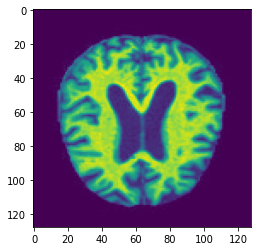

In [70]:
from PIL import Image
fig=Image.open("./archive/Dataset/Mild_Demented/mild.jpg")
plt.imshow(fig)
print(fig)

tensor([[[-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.]]])

In [138]:
train_data_cls=[]
train_label_cls=[]
test_data_cls=[]
test_label_cls=[]
for i,data in enumerate(train_data):
    train_data_cls.append(np.array(data[0].view(1,-1)[0]))
    train_label_cls.append(data[1])

for i,data in enumerate(test_data):
    test_data_cls.append(np.array(data[0].view(1,-1)[0]))
    test_label_cls.append(data[1])

train_data_cls=np.array(train_data_cls)
test_data_cls=np.array(test_data_cls)

In [139]:
n_train=len(train_data_cls)
n_test=len(test_data_cls)
print(n_train,n_test)

5120 1280


In [140]:
test_data_cls

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]], dtype=float32)

# KNN

In [141]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(train_data_cls,train_label_cls)
knn_pred=knn.predict(test_data_cls)
print(np.mean(knn_pred==test_label_cls))

0.971875


# Naive Bayes

In [144]:
train_c0=896-179
train_c1=64-13
train_c2=3200-634
train_c3=2240-454
total=train_c0+train_c1+train_c2+train_c3

In [145]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB(priors=[train_c0/total,train_c1/total,train_c2/total,train_c3/total])
nb.fit(train_data_cls,train_label_cls)
nb_pred=nb.predict(test_data_cls)
print(np.mean(nb_pred==test_label_cls))

0.4859375


# Logistic Regression

In [146]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(train_data_cls,train_label_cls)
log_pred=log.predict(test_data_cls)
print(np.mean(log_pred==test_label_cls))

D:\Anaconda3\envs\pytorch\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.89765625


# Decision Tree

In [147]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(train_data_cls,train_label_cls)
dt_pred=dt.predict(test_data_cls)
print(np.mean(dt_pred==test_label_cls))

0.6765625


# Random Forest

In [148]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(train_data_cls,train_label_cls)
rf_pred=rf.predict(test_data_cls)
print(np.mean(rf_pred==test_label_cls))

0.9203125


# SVM

In [149]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(train_data_cls,train_label_cls)
svc_pred=svc.predict(test_data_cls)
print(np.mean(svc_pred==test_label_cls))

0.7671875
